In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("wines_SPA.csv")
df

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
7495,Contino,Reserva,2016,4.2,392,Espana,Rioja,19.98,Rioja Red,4.0,3.0
7496,Conreria d'Scala Dei,Les Brugueres,2018,4.2,390,Espana,Priorato,16.76,Priorat Red,4.0,3.0
7497,Mustiguillo,Finca Terrerazo,2017,4.2,390,Espana,El Terrerazo,24.45,Red,4.0,3.0
7498,Matarromera,Gran Reserva,2011,4.2,389,Espana,Ribera del Duero,64.50,Ribera Del Duero Red,5.0,3.0


In [3]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["winery"]=le.fit_transform(df["winery"])
df["wine"]=le.fit_transform(df["wine"])
df["region"]=le.fit_transform(df["region"])
df["type"]=le.fit_transform(df["type"])
df["country"]=le.fit_transform(df["country"])
df

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,422,759,2013,4.9,58,0,69,995.00,19,5.0,3.0
1,33,819,2018,4.9,31,0,74,313.50,18,4.0,2.0
2,447,778,2009,4.8,1793,0,57,324.95,11,5.0,3.0
3,447,778,1999,4.8,1705,0,57,692.96,11,5.0,3.0
4,447,778,1996,4.8,1309,0,57,778.06,11,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
7495,159,619,2016,4.2,392,0,59,19.98,12,4.0,3.0
7496,158,440,2018,4.2,390,0,53,16.76,9,4.0,3.0
7497,334,302,2017,4.2,390,0,24,24.45,10,4.0,3.0
7498,316,342,2011,4.2,389,0,57,64.50,11,5.0,3.0


In [4]:
df.isnull().sum()

winery            0
wine              0
year              2
rating            0
num_reviews       0
country           0
region            0
price             0
type              0
body           1169
acidity        1169
dtype: int64

In [5]:
df["year"]=df["year"].fillna(df["year"][2])
df.isnull().sum()

winery            0
wine              0
year              0
rating            0
num_reviews       0
country           0
region            0
price             0
type              0
body           1169
acidity        1169
dtype: int64

In [6]:
df["acidity"]=df["acidity"].fillna(df["acidity"].mean())
df["body"]=df["body"].fillna(df["body"].mean())
df

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,422,759,2013,4.9,58,0,69,995.00,19,5.0,3.0
1,33,819,2018,4.9,31,0,74,313.50,18,4.0,2.0
2,447,778,2009,4.8,1793,0,57,324.95,11,5.0,3.0
3,447,778,1999,4.8,1705,0,57,692.96,11,5.0,3.0
4,447,778,1996,4.8,1309,0,57,778.06,11,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
7495,159,619,2016,4.2,392,0,59,19.98,12,4.0,3.0
7496,158,440,2018,4.2,390,0,53,16.76,9,4.0,3.0
7497,334,302,2017,4.2,390,0,24,24.45,10,4.0,3.0
7498,316,342,2011,4.2,389,0,57,64.50,11,5.0,3.0


In [7]:
print(df.isin(['N.V.']).sum()) 
df["year"]=df["year"].replace("N.V.",np.nan)
df

winery           0
wine             0
year           288
rating           0
num_reviews      0
country          0
region           0
price            0
type             0
body             0
acidity          0
dtype: int64


,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,422,759,2013,4.9,58,0,69,995.00,19,5.0,3.0
1,33,819,2018,4.9,31,0,74,313.50,18,4.0,2.0
2,447,778,2009,4.8,1793,0,57,324.95,11,5.0,3.0
3,447,778,1999,4.8,1705,0,57,692.96,11,5.0,3.0
4,447,778,1996,4.8,1309,0,57,778.06,11,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
7495,159,619,2016,4.2,392,0,59,19.98,12,4.0,3.0
7496,158,440,2018,4.2,390,0,53,16.76,9,4.0,3.0
7497,334,302,2017,4.2,390,0,24,24.45,10,4.0,3.0
7498,316,342,2011,4.2,389,0,57,64.50,11,5.0,3.0


In [8]:
import numpy as np

df['year'] = pd.to_numeric(df['year'], errors='coerce')
df['year'] = df['year'].fillna(df['year'].mean())  
df

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,422,759,2013.0,4.9,58,0,69,995.00,19,5.0,3.0
1,33,819,2018.0,4.9,31,0,74,313.50,18,4.0,2.0
2,447,778,2009.0,4.8,1793,0,57,324.95,11,5.0,3.0
3,447,778,1999.0,4.8,1705,0,57,692.96,11,5.0,3.0
4,447,778,1996.0,4.8,1309,0,57,778.06,11,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
7495,159,619,2016.0,4.2,392,0,59,19.98,12,4.0,3.0
7496,158,440,2018.0,4.2,390,0,53,16.76,9,4.0,3.0
7497,334,302,2017.0,4.2,390,0,24,24.45,10,4.0,3.0
7498,316,342,2011.0,4.2,389,0,57,64.50,11,5.0,3.0


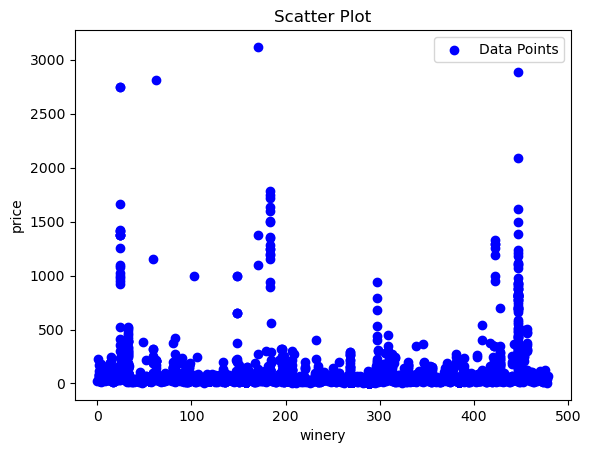

In [9]:
plt.scatter(df["winery"],df["price"], color='blue', marker='o', label="Data Points")
plt.xlabel("winery")
plt.ylabel("price")
plt.title("Scatter Plot")
plt.legend()



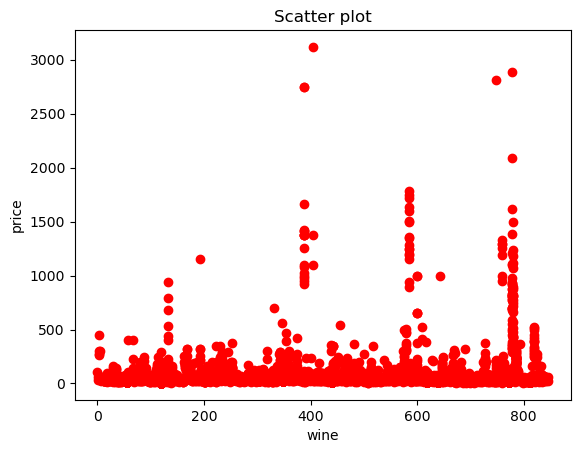

In [10]:
plt.scatter(df["wine"],df["price"], color='red',marker='o',label="Data Points")
plt.xlabel("wine")
plt.ylabel("price")
plt.title("Scatter plot")
plt.show()

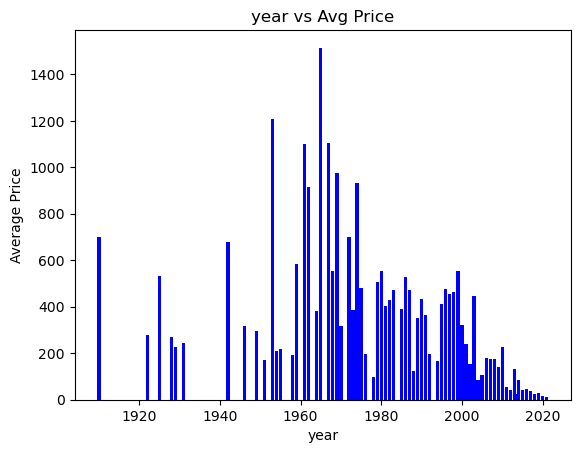

In [11]:
avgprice_year = df.groupby("year")["price"].mean()
plt.bar(avgprice_year.index,avgprice_year.values,color='blue',linewidth=20 )
plt.xlabel("year")
plt.ylabel("Average Price")
plt.title("year vs Avg Price")
plt.show()

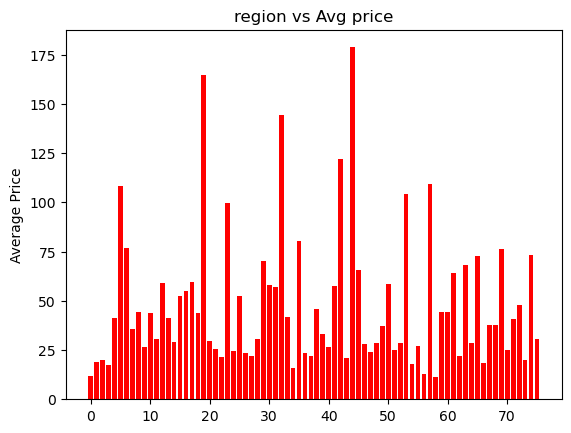

In [12]:
avg_price=df.groupby("region")["price"].mean()
plt.bar(avg_price.index,avg_price.values,color='red',linewidth=30)
plt.ylabel("Average Price")
plt.title("region vs Avg price")
plt.show()